<a href="https://colab.research.google.com/github/Brilliyandddd/PCVK/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kelompok 2

1. Agung Afrizal Daffa (2141720110)
2. Brilliyand Noval Herdana Putra (2141720104)
3. Muhammad Islahuddin (2141720268)

# Prepare

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install pytesseract

In [46]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from cv2 import imwrite
from google.colab.patches import cv2_imshow

# Global Threshold

In [ ]:
# Mengganti dengan path atau nama berkas gambar di local storage Anda
image_path = '/content/drive/MyDrive/PCVK/Week10/gradient.jpg'

# Membaca gambar
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Menentukan ambang manual
threshold = 170

# BINARY Thresholding
_, binary_threshold = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

# BINARY_INV Thresholding
_, binary_inv_threshold = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY_INV)

# TRUNC Thresholding
_, trunc_threshold = cv2.threshold(image, threshold, 255, cv2.THRESH_TRUNC)

# TOZERO Thresholding
_, tozero_threshold = cv2.threshold(image, threshold, 255, cv2.THRESH_TOZERO)

# TOZERO_INV Thresholding
_, tozero_inv_threshold = cv2.threshold(image, threshold, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [image, binary_threshold, binary_inv_threshold, trunc_threshold, tozero_threshold, tozero_inv_threshold]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

# Otsu's Thresholding

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/PCVK/Week9/KTP/ktp.png'

# Membaca gambar
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Set threshold untuk output kedua
threshold_90 = 90

# Tampilkan gambar asli
cv2_imshow(image)
plt.show()

# Tampilkan gambar dengan threshold 90
_, thresholded_90 = cv2.threshold(image, threshold_90, 255, cv2.THRESH_BINARY)
thresholded_90 = cv2.resize(thresholded_90, None, fx=0.5, fy=0.5)  # Memperkecil gambar
cv2_imshow(thresholded_90)
plt.show()

# Set threshold untuk output ketiga
threshold_167 = 167

# Tampilkan gambar dengan threshold 167
_, thresholded_167 = cv2.threshold(image, threshold_167, 255, cv2.THRESH_BINARY)
thresholded_167 = cv2.resize(thresholded_167, None, fx=0.5, fy=0.5)  # Memperkecil gambar
cv2_imshow(thresholded_167)
plt.show()

# Histogram

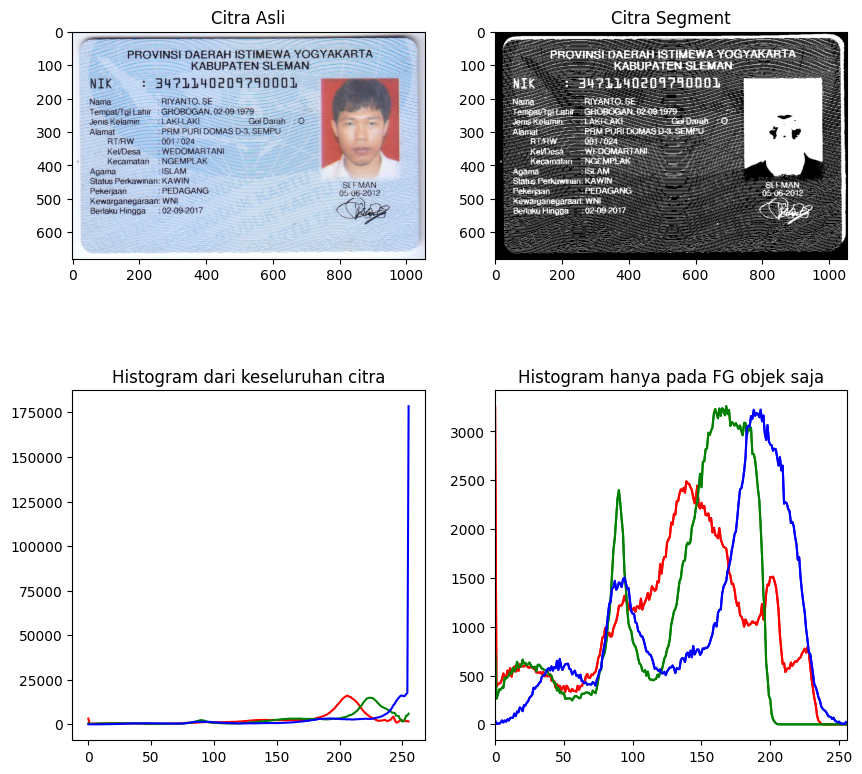

In [48]:
filename_3 = ('/content/drive/MyDrive/PCVK/Week9/KTP/ktp.png')
img_l = cv2.imread(filename_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

# Segmentasi

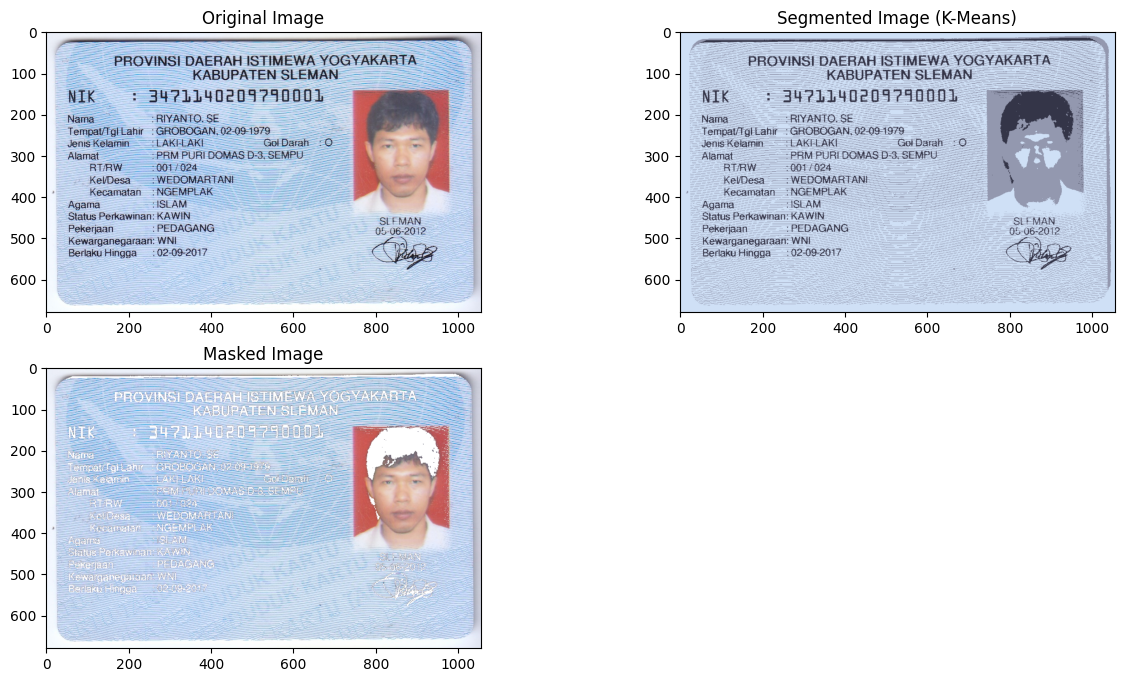

In [63]:
from sklearn.cluster import KMeans

# Load the image
filename = '/content/drive/MyDrive/PCVK/Week10/KTP/ktp.png'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.subplot(2, 2, 3), plt.imshow(masked_image)
plt.title('Masked Image')

plt.show()

# Tugas

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Daftar metode thresholding yang akan digunakan
threshold_methods = [
    cv2.THRESH_BINARY,
    cv2.THRESH_BINARY_INV,
    cv2.THRESH_TRUNC,
    cv2.THRESH_TOZERO,
    cv2.THRESH_TOZERO_INV
]

# Fungsi untuk menerapkan metode thresholding ke gambar dan menampilkannya di output field
def apply_and_show_thresholding(image, method, method_name):
    _, thresholded_image = cv2.threshold(image, 0, 255, method)
    plt.figure(figsize=(5, 5))
    plt.imshow(thresholded_image, cmap='gray')
    plt.title(f"{method_name} Thresholding")
    plt.axis('off')
    plt.show()

# Fungsi untuk menerapkan Otsu's Thresholding ke gambar dan menampilkannya di output field
def apply_and_show_otsu_thresholding(image):
    _, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.figure(figsize=(5, 5))
    plt.imshow(thresholded_image, cmap='gray')
    plt.title("Otsu's Thresholding")
    plt.axis('off')
    plt.show()

# Folder sumber
source_folder = '/content/drive/MyDrive/PCVK/Week10/KTP'

# Loop melalui semua gambar di folder sumber
for filename in os.listdir(source_folder):
    if filename.endswith('.jpeg') or filename.endswith('.png'):
        image_path = os.path.join(source_folder, filename)

        # Baca gambar
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Loop melalui metode thresholding dan tampilkan hasilnya di output field
        for method, method_name in zip(threshold_methods, ["Binary", "Binary Inverse", "Truncate", "To Zero", "To Zero Inverse"]):
            apply_and_show_thresholding(image, method, method_name)

        # Terapkan Otsu's Thresholding dan tampilkan hasilnya di output field
        apply_and_show_otsu_thresholding(image)